In [1]:
import pandas as pd 
import pandas_datareader as pdr
import matplotlib.pyplot as plt 
import seaborn as sns
from Finance import *

In [2]:
aapl = pdr.get_data_yahoo('SPY', '2021-01-01')

In [3]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,375.450012,364.820007,375.309998,368.790009,110210800.0,363.938782
2021-01-05,372.500000,368.049988,368.100006,371.329987,66426200.0,366.445343
2021-01-06,376.980011,369.119995,369.709991,373.549988,107997700.0,368.636139
2021-01-07,379.899994,375.910004,376.100006,379.100006,68766800.0,374.113129
2021-01-08,381.489990,377.100006,380.589996,381.260010,71677200.0,376.244720


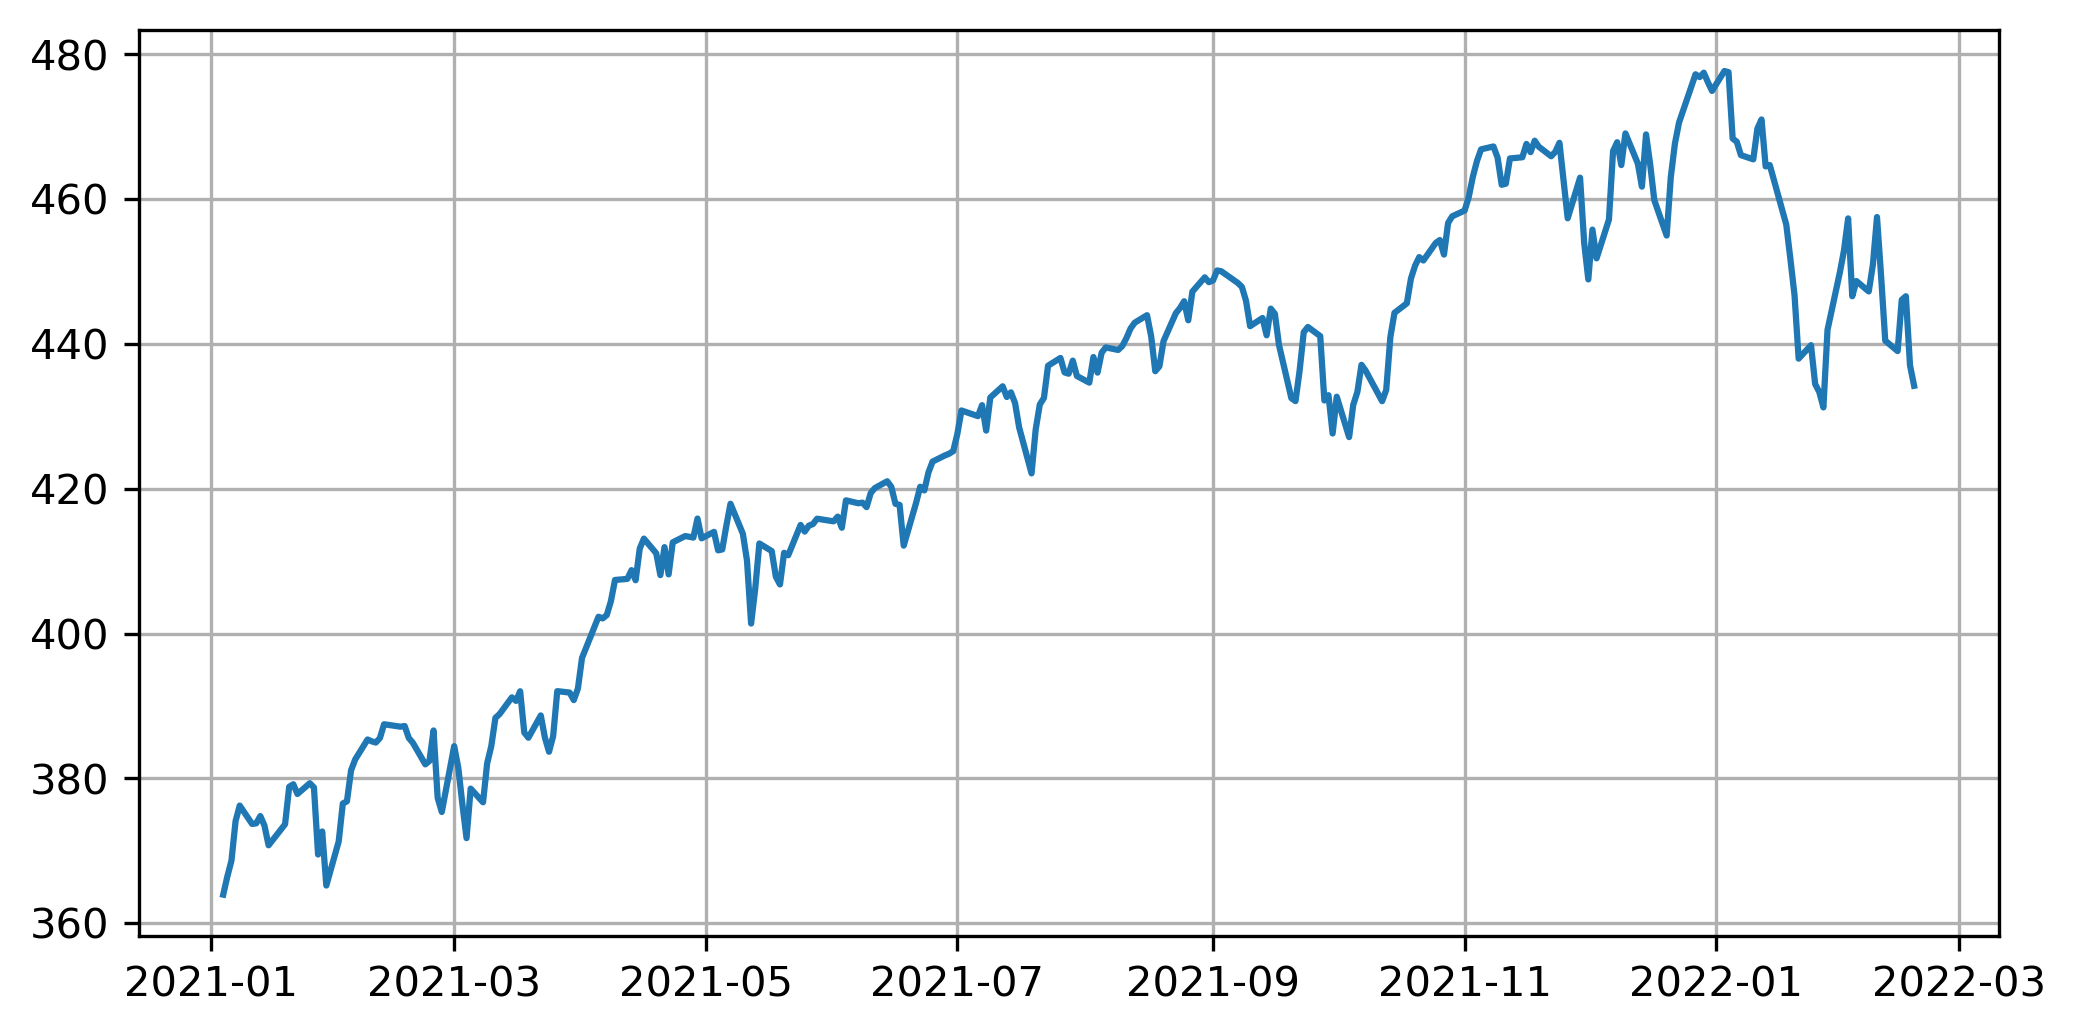

In [4]:
plt.figure(figsize=(8,4), dpi=300)
plt.grid(True)
plt.plot(aapl.index, aapl['Adj Close'])

In [5]:
aapl['MA_200'] = aapl['Adj Close'].rolling(window =200).mean()
aapl['MA_50'] = aapl['Adj Close'].rolling(window =50).mean()
aapl['MA_20'] = aapl['Adj Close'].rolling(window =20).mean()

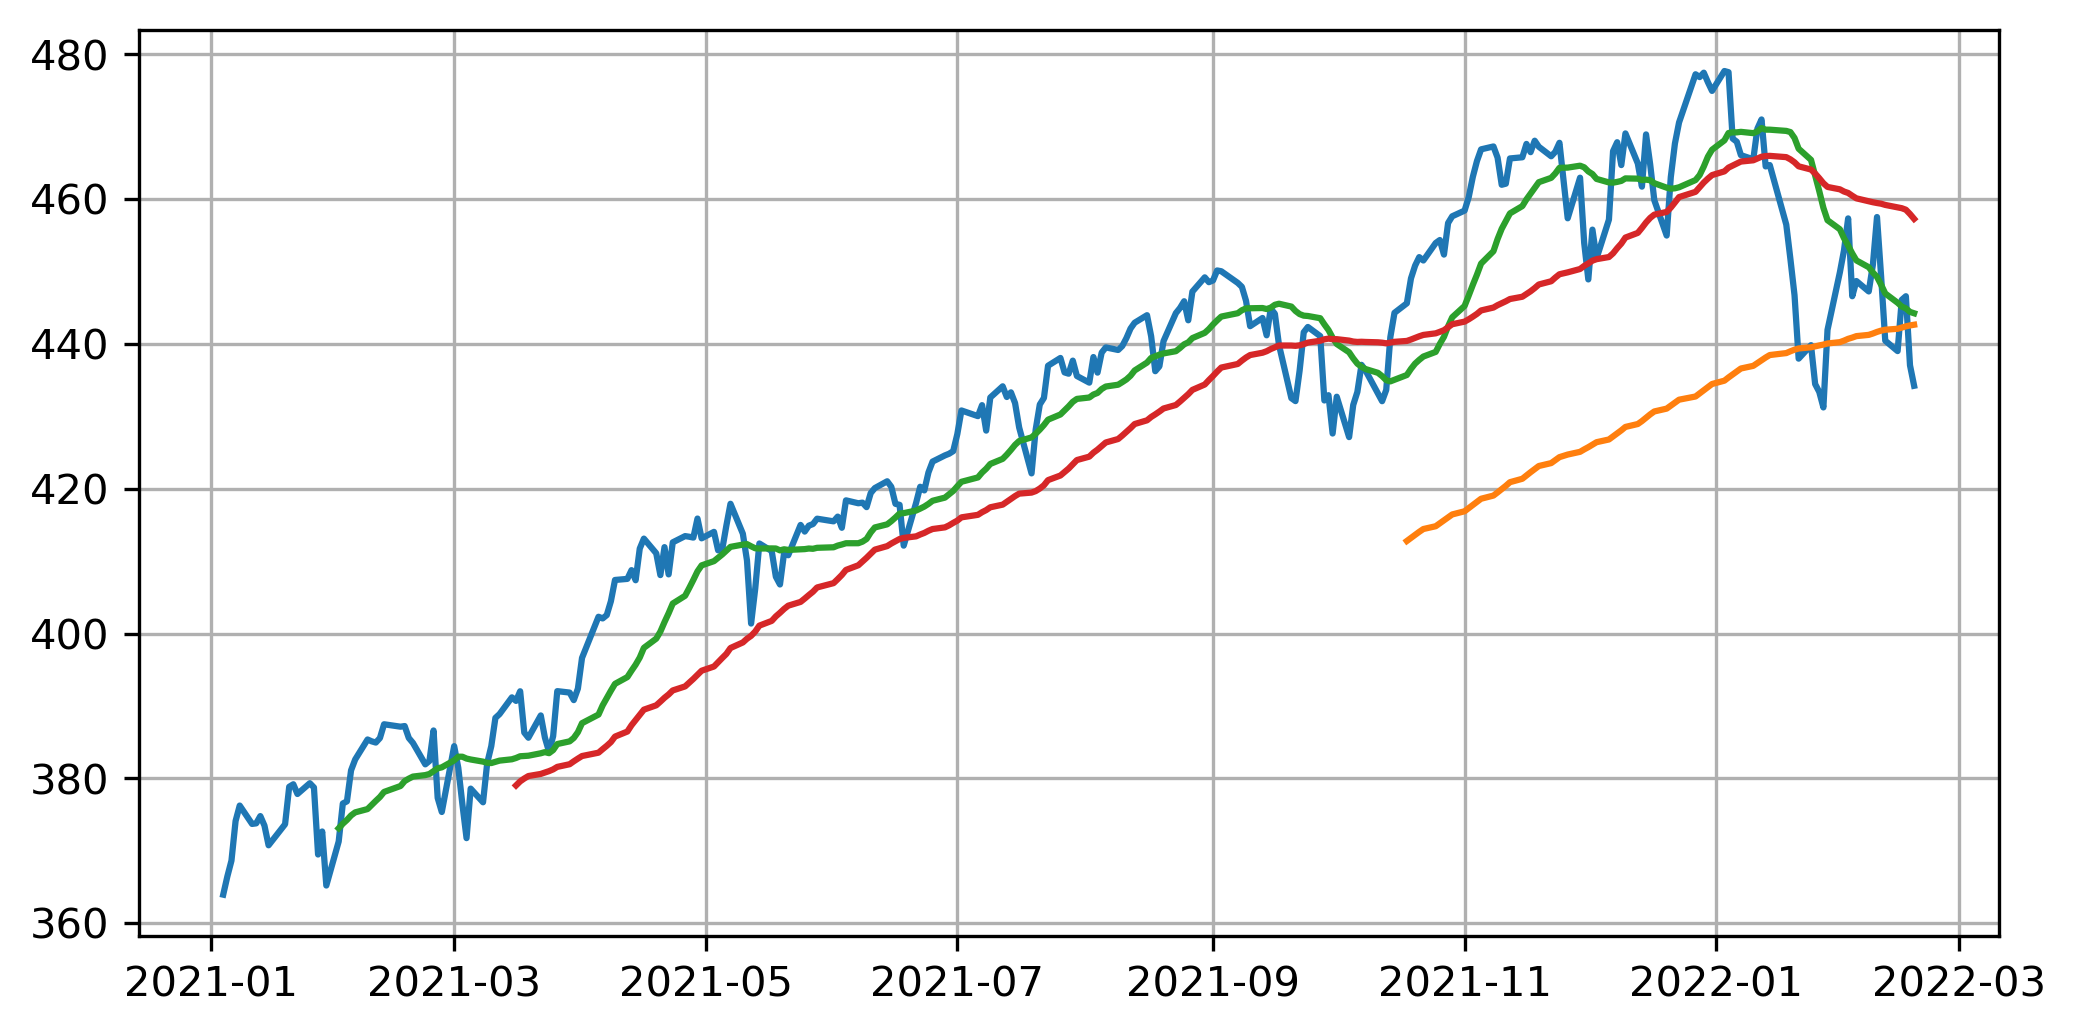

In [6]:
plt.figure(figsize=(8,4), dpi=300)
plt.grid(True)
plt.plot(aapl.index, aapl['Adj Close'])
plt.plot(aapl.index, aapl.MA_200)
plt.plot(aapl.index, aapl.MA_20)
plt.plot(aapl.index, aapl.MA_50)

In [7]:
aapl['Up_20BB'], aapl['Down_20BB'] = get_bollinger_bands(aapl['Adj Close'])

In [8]:
aapl

,High,Low,Open,Close,Volume,Adj Close,MA_200,MA_50,MA_20,Up_20BB,Down_20BB
Date,,,,,,,,,,,
2021-01-04,375.450012,364.820007,375.309998,368.790009,110210800.0,363.938782,NaN,NaN,NaN,NaN,NaN
2021-01-05,372.500000,368.049988,368.100006,371.329987,66426200.0,366.445343,NaN,NaN,NaN,NaN,NaN
2021-01-06,376.980011,369.119995,369.709991,373.549988,107997700.0,368.636139,NaN,NaN,NaN,NaN,NaN
2021-01-07,379.899994,375.910004,376.100006,379.100006,68766800.0,374.113129,NaN,NaN,NaN,NaN,NaN
2021-01-08,381.489990,377.100006,380.589996,381.260010,71677200.0,376.244720,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-14,441.600006,435.339996,439.920013,439.019989,123006300.0,439.019989,442.103322,458.876328,445.695003,461.722591,429.667415
2022-02-15,446.279999,443.179993,443.730011,446.100006,88659500.0,446.100006,442.263569,458.761676,445.175504,460.382370,429.968638
2022-02-16,448.059998,441.940002,443.929993,446.600006,84863600.0,446.600006,442.439089,458.550000,444.918004,459.827632,430.008376


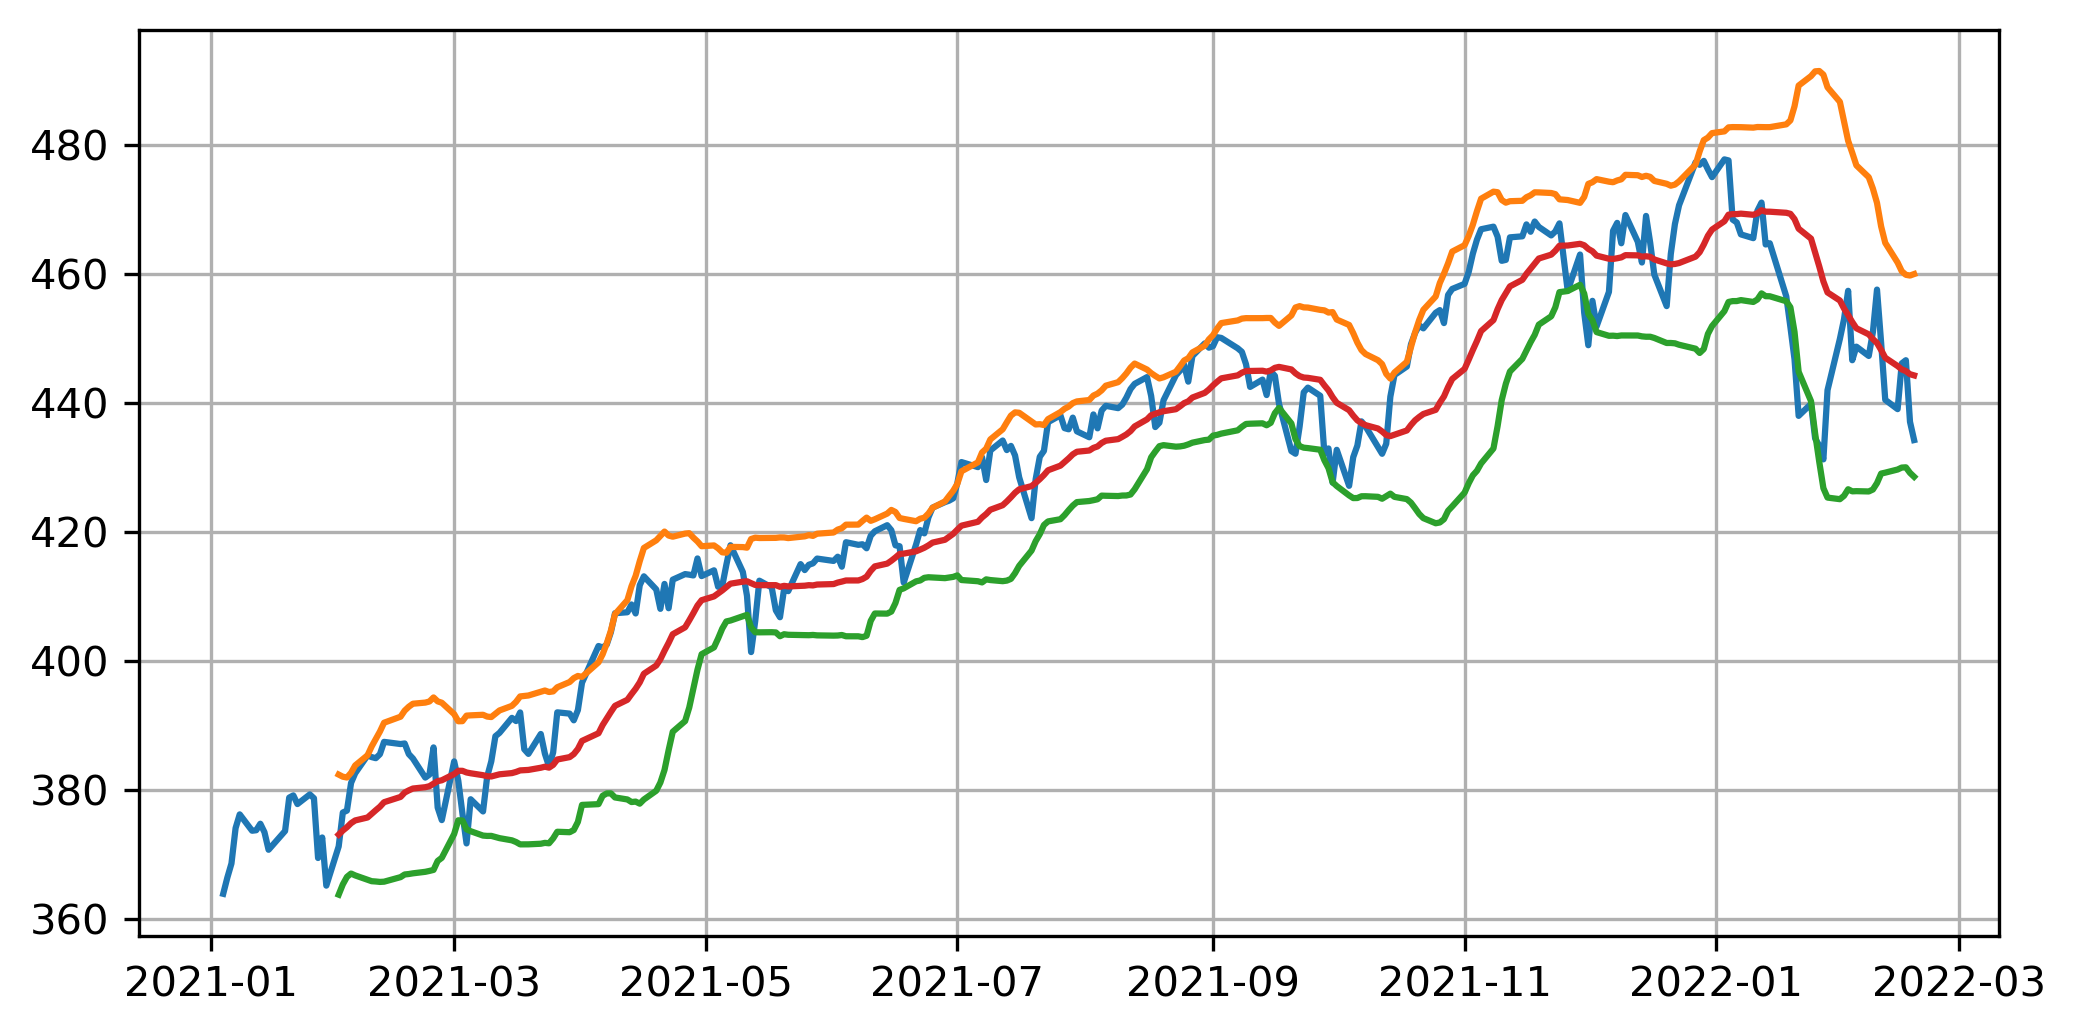

In [9]:
plt.figure(figsize=(8,4), dpi=300)
plt.grid(True)
plot_bollinger_bands(aapl['Adj Close'])

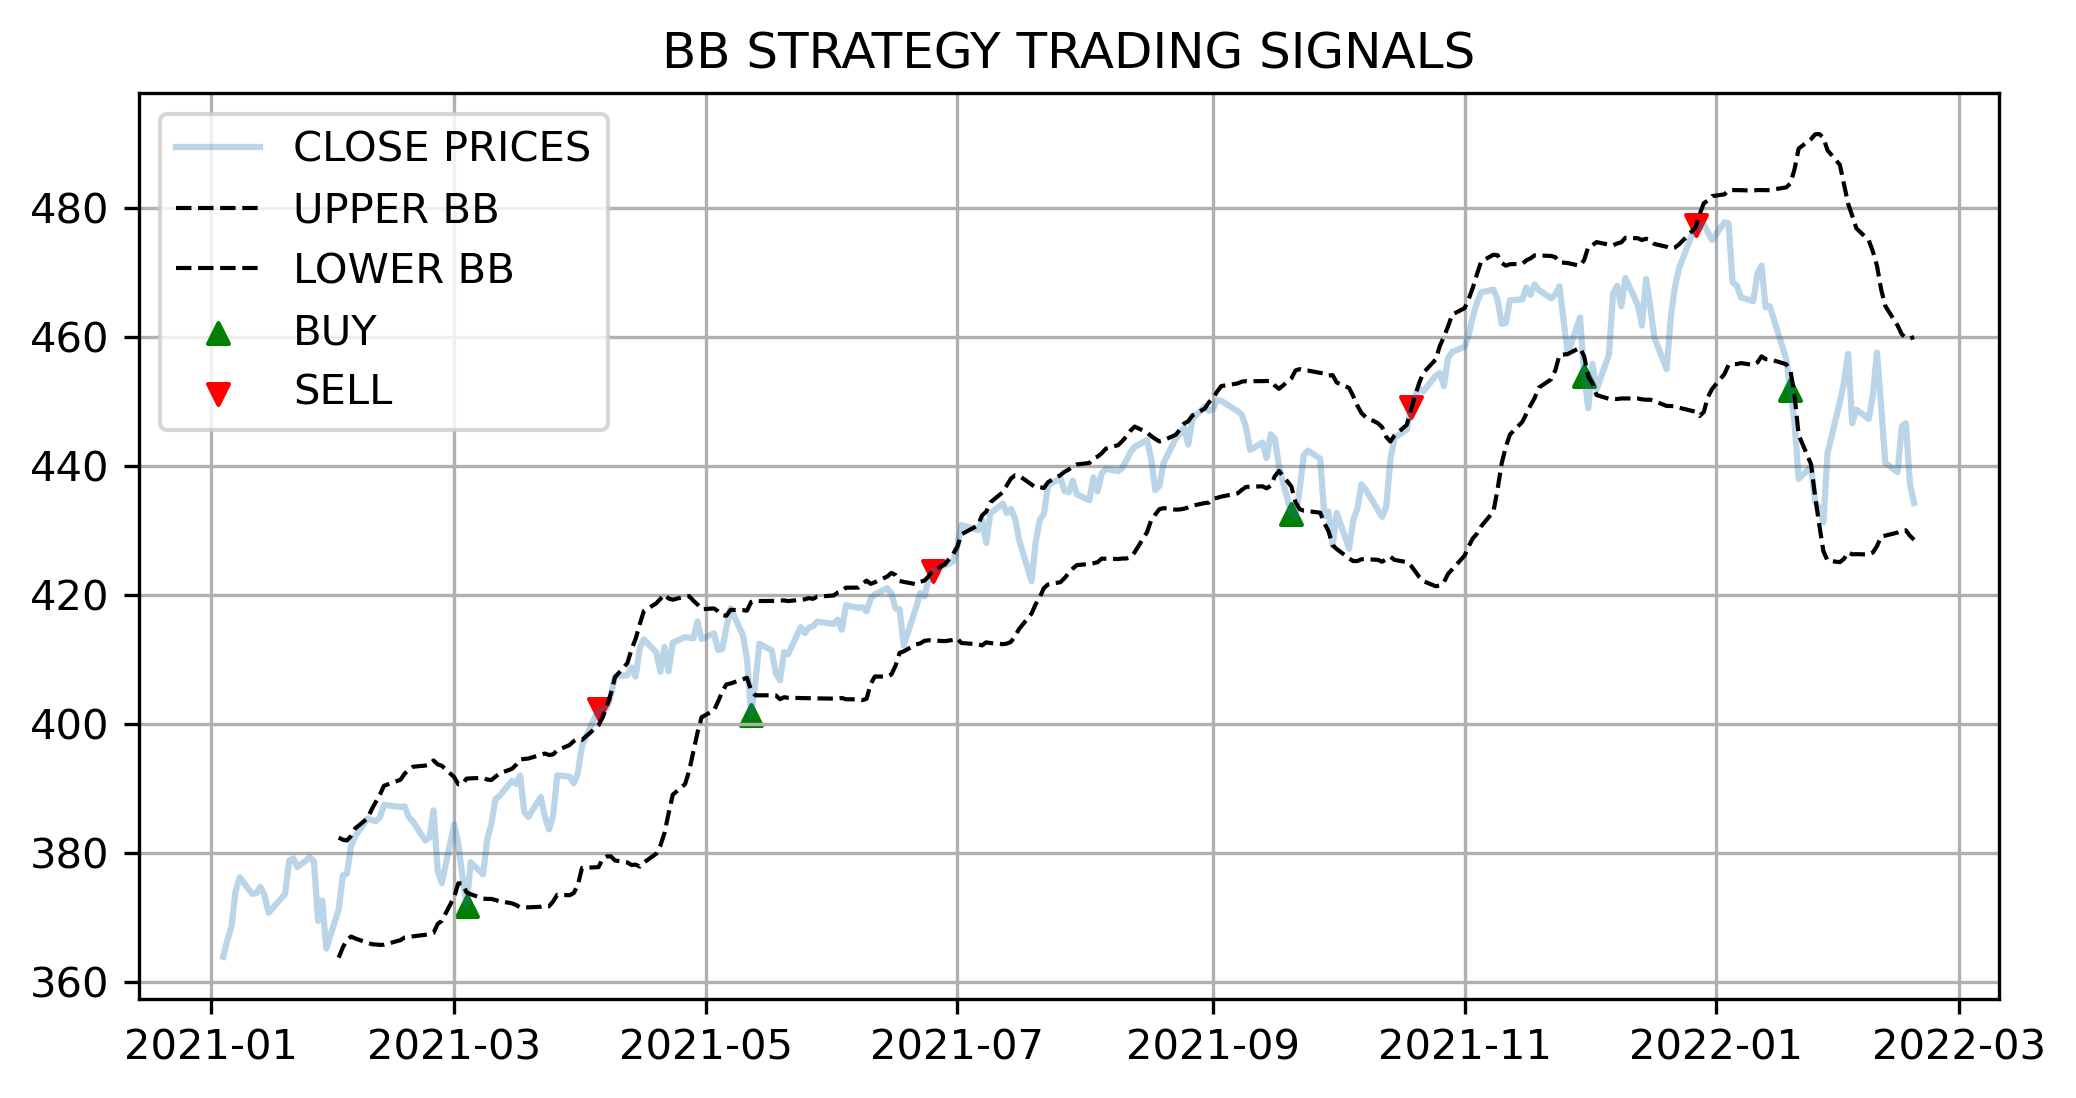

In [10]:
plot_bb_strategy(aapl['Adj Close'],aapl.Up_20BB, aapl.Down_20BB)

In [11]:
return_strategy(aapl['Adj Close'],aapl.Up_20BB, aapl.Down_20BB)

,Date,Adj Close,Up_20BB,Down_20BB,bb_signal,bb_position
0,2021-01-04,363.938782,NaN,NaN,0,1
1,2021-01-05,366.445343,NaN,NaN,0,1
2,2021-01-06,368.636139,NaN,NaN,0,1
3,2021-01-07,374.113129,NaN,NaN,0,1
4,2021-01-08,376.244720,NaN,NaN,0,1
...,...,...,...,...,...,...
281,2022-02-14,439.019989,461.722591,429.667415,0,1
282,2022-02-15,446.100006,460.382370,429.968638,0,1
283,2022-02-16,446.600006,459.827632,430.008376,0,1
284,2022-02-17,437.059998,459.717537,429.149470,0,1


In [12]:
backtest_strategy(aapl['Adj Close'],aapl.Up_20BB, aapl.Down_20BB)

Profit gained from the BB strategy by investing $100k: 19107.8
Profit percentage of the BB strategy : 19%
